# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
# Signal width
N = 128

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = None

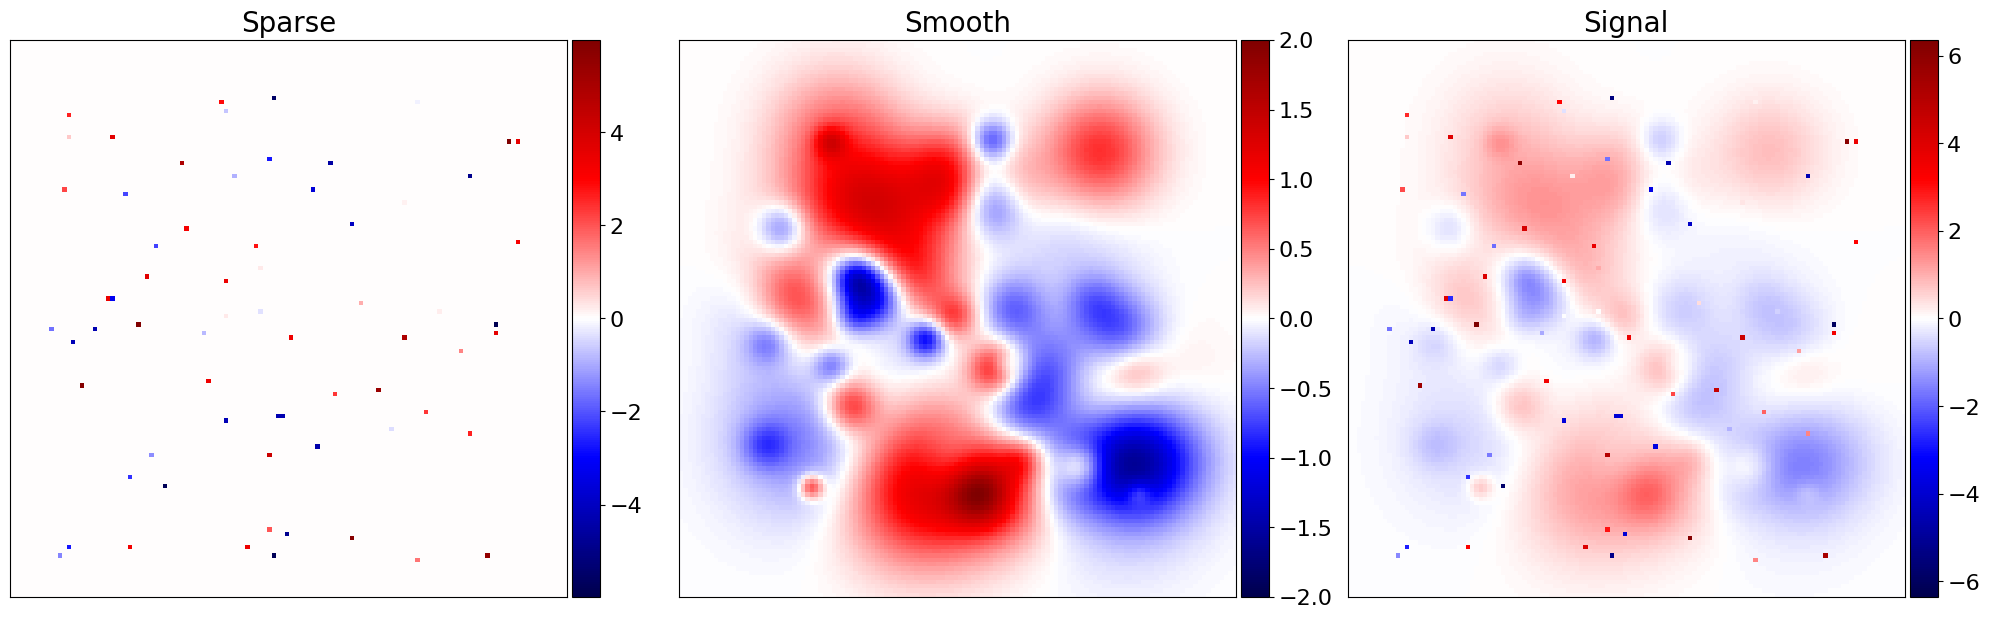

In [35]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal);

# Operator $\phi$

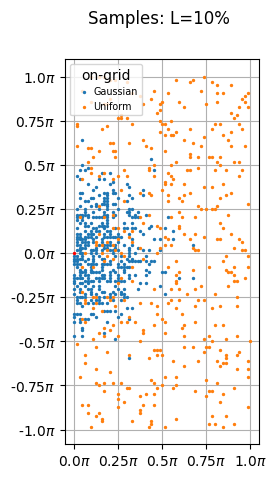

In [5]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [6]:
# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

# Use Laplacian ?
laplacian = True

### Coupled

In [7]:
coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled, laplacian)

Coupled
INFO -- [2023-12-17 11:27:46.131025] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 11:28:05.268416] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.00035500257953990835
INFO -- [2023-12-17 11:28:11.190254] Iteration 618
	iteration: 618
	N_iter: 619.0
	RelError[x]: 9.918569974693721e-05
INFO -- [2023-12-17 11:28:11.191267] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x154b92b60>


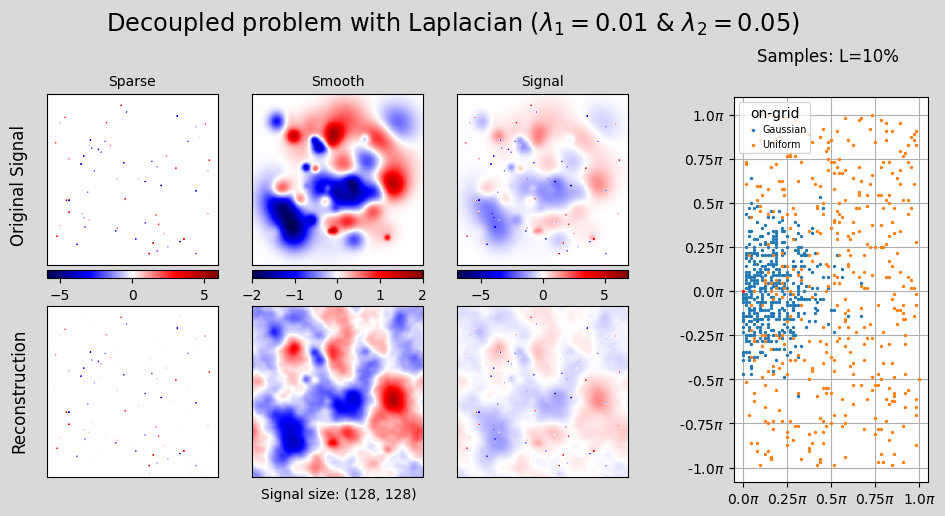

Button(description='SAVE', style=ButtonStyle())

Output()

In [29]:
sparse_rcstr_coupled, smooth_rcstr_coupled, signal_rcstr_coupled = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_coupled, smooth_rcstr_coupled],
    lambda1,
    lambda2,
    op,
    coupled,
    laplacian
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

### Decoupled

In [9]:
coupled = False

x1_, x2_ = solve(y, op, lambda1, lambda2, coupled, laplacian)

Decoupled
Co-Gram Identity
INFO -- [2023-12-17 11:28:21.870277] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-12-17 11:28:23.427597] Iteration 161
	iteration: 161
	N_iter: 162.0
	RelError[x]: 9.60382607894605e-05
INFO -- [2023-12-17 11:28:23.428531] Stopping Criterion satisfied -> END


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x155ad13c0>


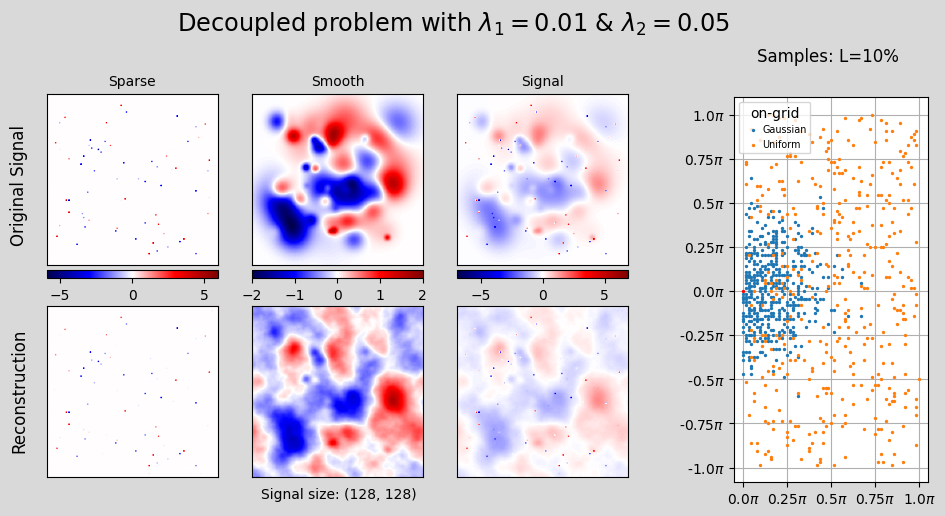

Button(description='SAVE', style=ButtonStyle())

Output()

In [10]:
sparse_rcstr_decoupled, smooth_rcstr_decoupled, signal_rcstr_decoupled = map(
    lambda x: x.reshape((N,N)), (x1_, x2_, x1_ + x2_)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr_decoupled, smooth_rcstr_decoupled],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

les 6 reconstructions 
time
les différences smooth
                sparse - off peaks
                       - on peaks 

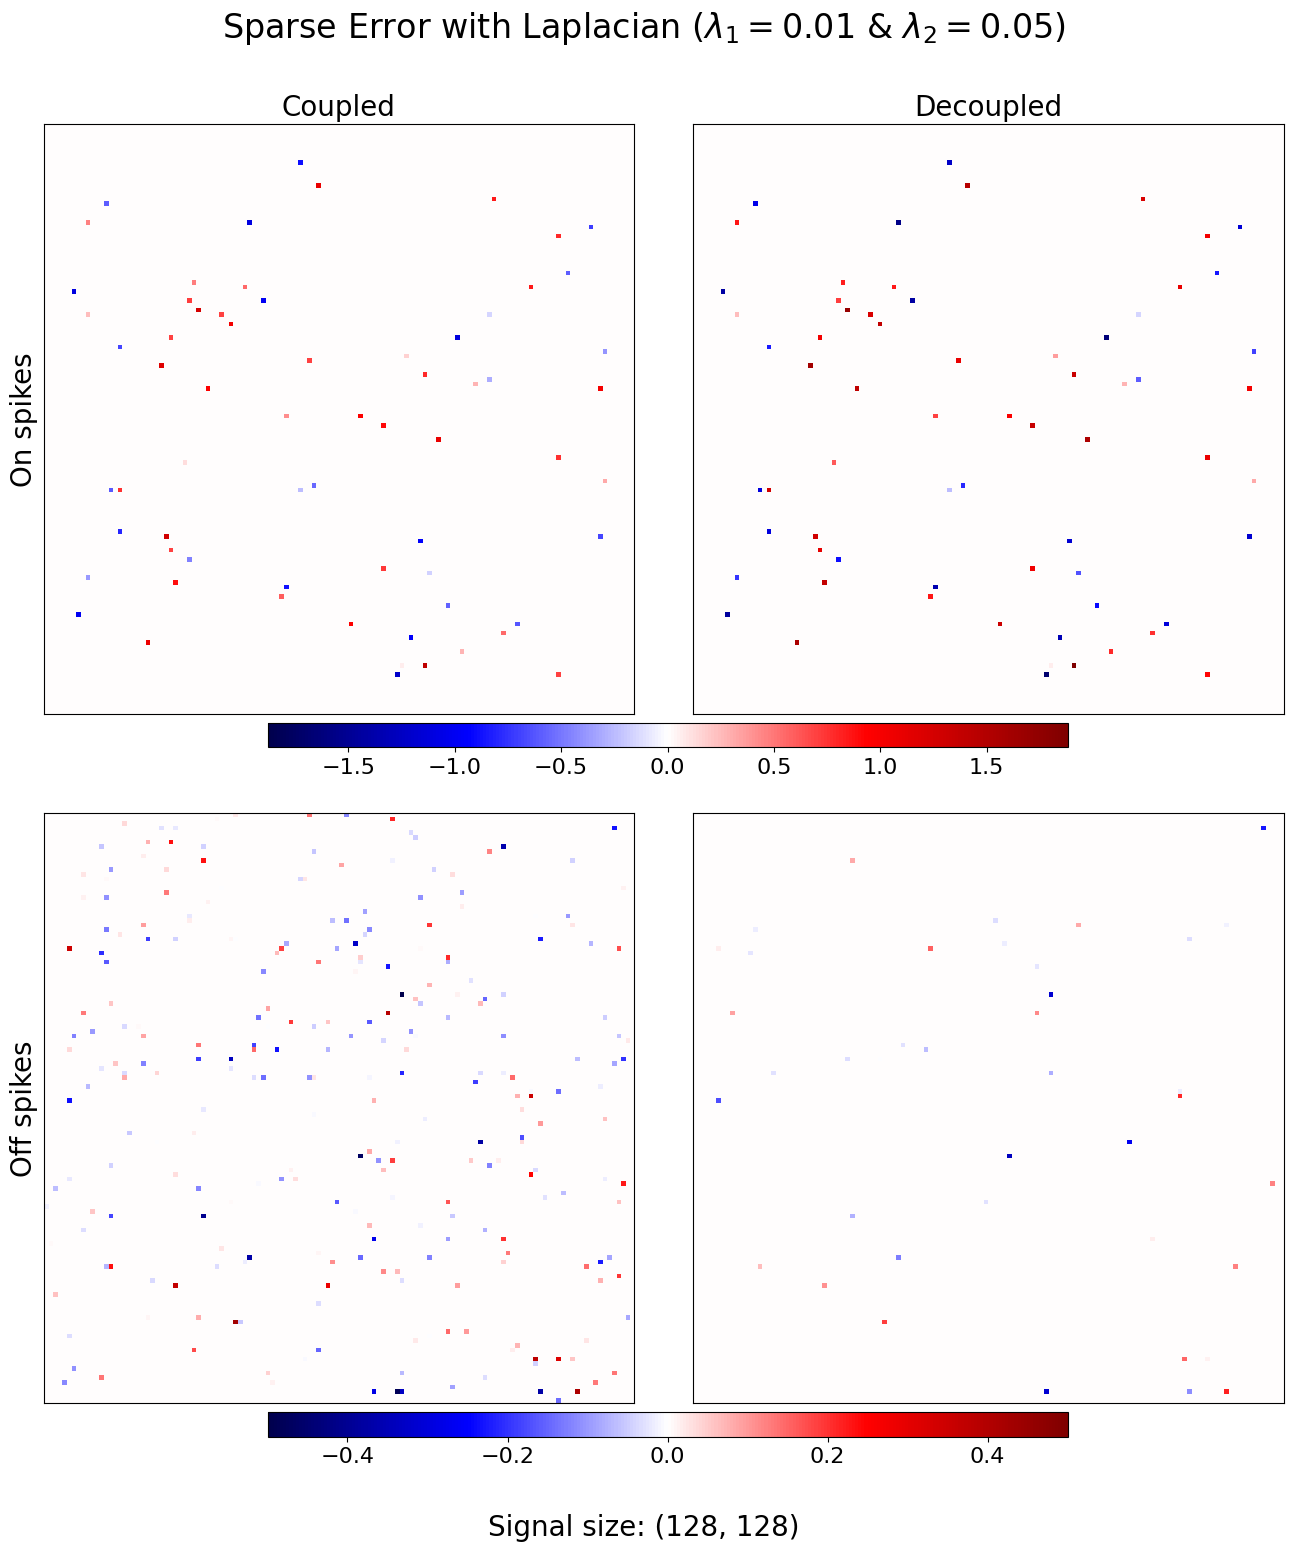

In [25]:
sparse_error(
    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_signal,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
)
print()

evaluer cost function
temps de reconstruction (fixe taille image, lambda, 10 operations, ensuite varier taille image (512, si marche pas 256))

mettre image côte à côte (chaque taille) avec diff

In [14]:
laplacian = Laplacian((op.N, op.N), mode="wrap")
#objective_func(op,laplacian,y,sparse_rcstr )

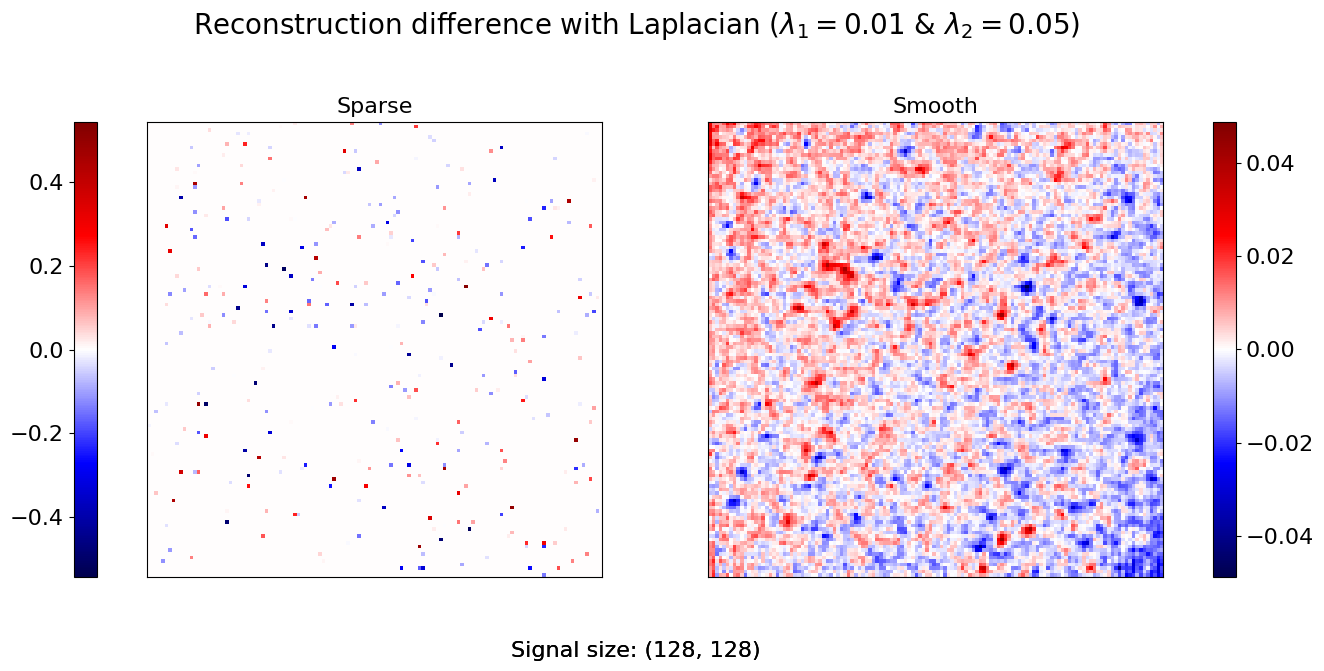

In [15]:
difference(    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
    smooth_rcstr_coupled,
    smooth_rcstr_decoupled,);

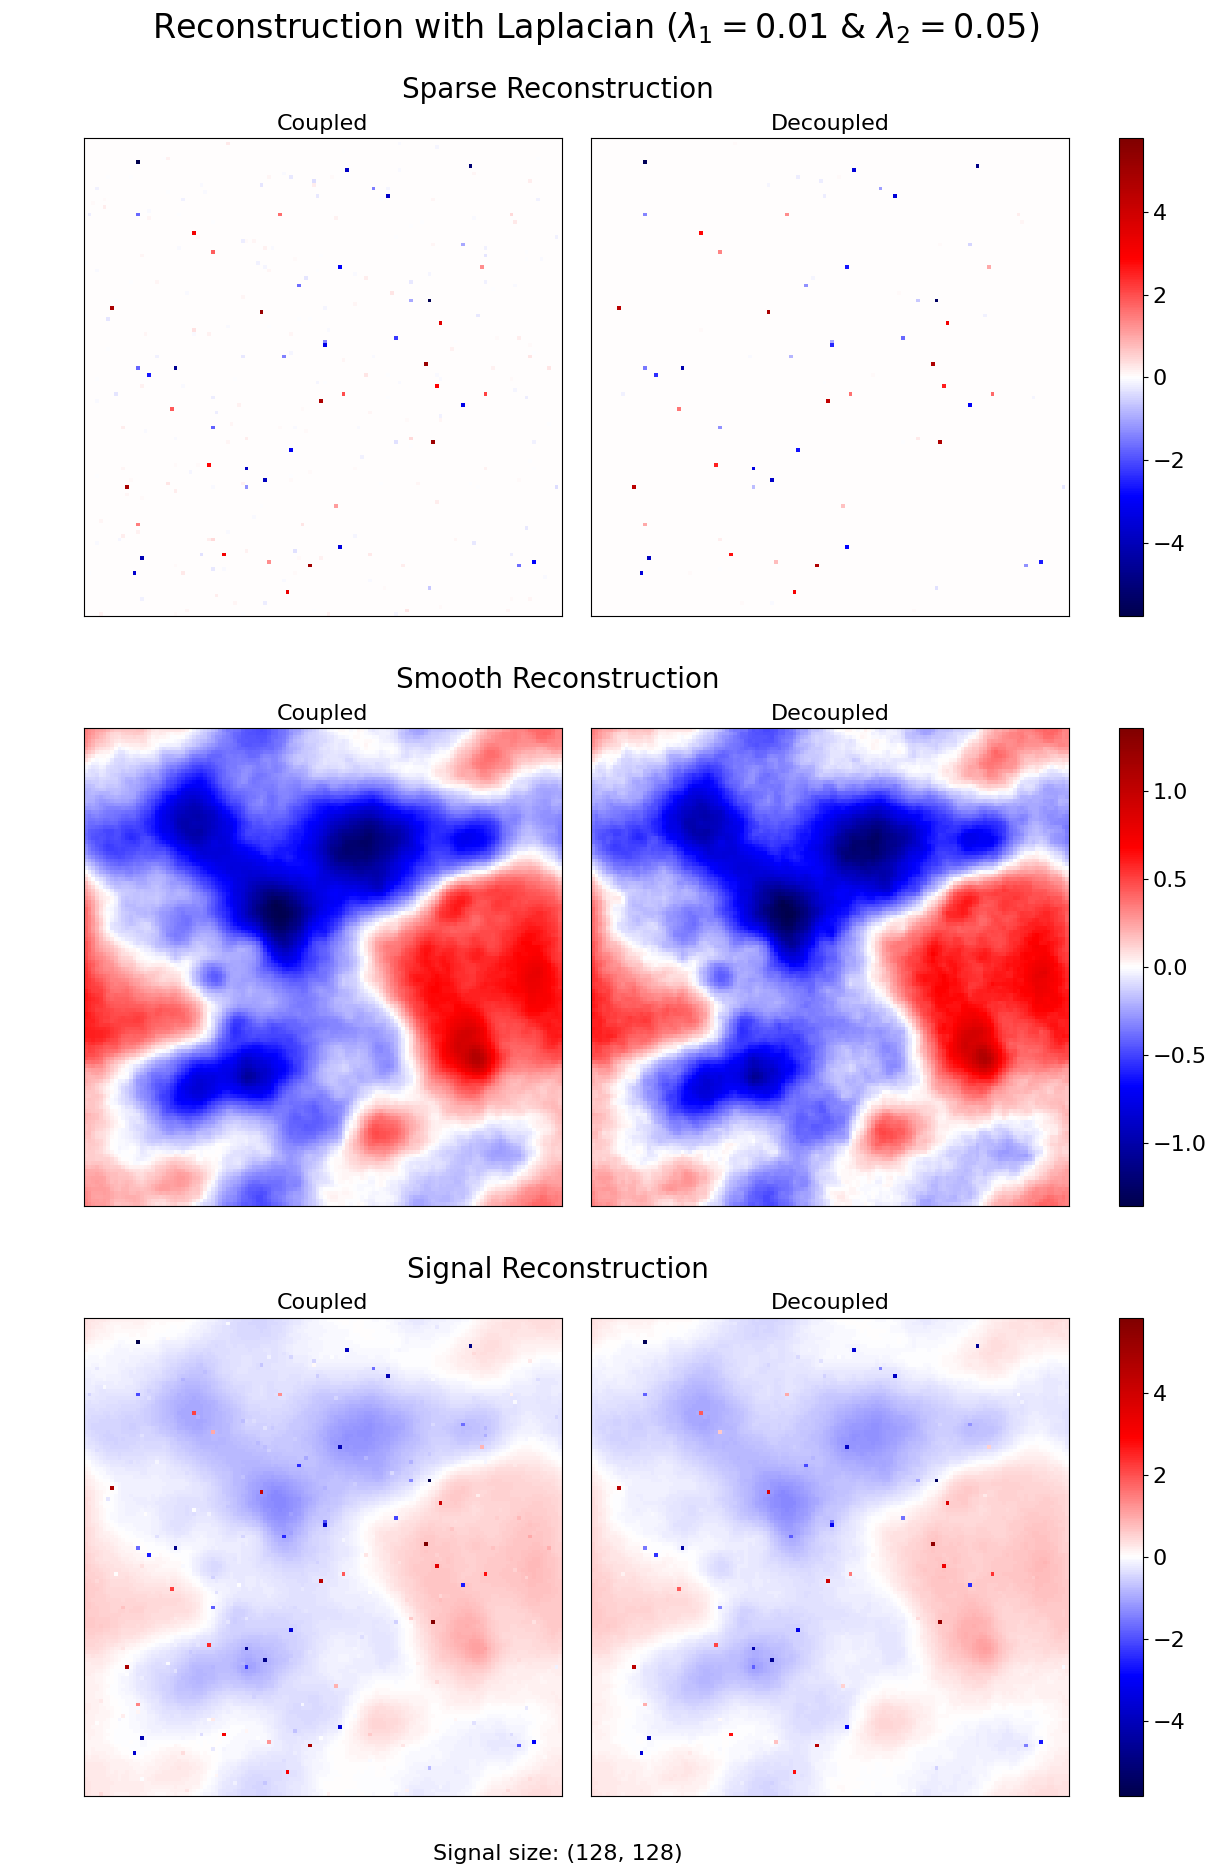

In [15]:
laplacian = True
compare(
    N,
    laplacian,
    lambda1,
    lambda2,
    sparse_rcstr_coupled,
    sparse_rcstr_decoupled,
    smooth_rcstr_coupled,
    smooth_rcstr_decoupled,
    signal_rcstr_coupled,
    signal_rcstr_decoupled,
)
print()

In [ ]:
import time

In [ ]:
lambda1 = 1e-2
lambda2 = 5e-2

sparse_range = (-6, 6)
density = 0.005

smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)

L = 0.1
theta = 0.5
psnr = 50

for N in [64, 128, 256, 512]:
    laplacian_op = Laplacian((N, N), mode="wrap")
    nb_gaussian = int(0.5 * N)
    for seed in range(10):
        # Create signal and operator
        sparse_signal = compute_sparse(N, sparse_range, density, seed)
        smooth_signal = compute_smooth(
            N, smooth_amplitude, sigmas_range, nb_gaussian, seed
        )
        signal = sparse_signal + smooth_signal
        original_sig = plot_signal(sparse_signal, smooth_signal)
        op = NuFFT(N, L, theta, on_grid=True, seed=seed)
        x0 = signal.reshape(-1)
        y0 = op(x0)
        y = compute_y(y0, psnr)
        for laplacian in [True, False]:
            for coupled in [True, False]:
                start = time.time()
                x1, x2 = solve(y, op, lambda1, lambda2, coupled, laplacian)
                time_solve = time.time() - start_coupled
                (
                    sparse_rcstr,
                    smooth_rcstr,
                    signal_rcstr,
                ) = map(
                    lambda x: x.reshape((N, N)),
                    (x1_coupled, x2_coupled, x1_coupled + x2_coupled),
                )
                cost_coupled = objective_func(
                    op,
                    laplacian_op,
                    y,
                    sparse_rcstr,
                    smooth_rcstr,
                    lambda1,
                    lambda2,
                )
            # Coupled
            coupled = True
            start_coupled = time.time()
            x1_coupled, x2_coupled = solve(y, op, lambda1, lambda2, coupled, laplacian)
            time_coupled = time.time() - start_coupled
            (
                sparse_rcstr_coupled,
                smooth_rcstr_coupled,
                signal_rcstr_coupled,
            ) = map(
                lambda x: x.reshape((N, N)),
                (x1_coupled, x2_coupled, x1_coupled + x2_coupled),
            )
            cost_coupled = objective_func(
                op,
                laplacian_op,
                y,
                sparse_rcstr_coupled,
                smooth_rcstr_coupled,
                lambda1,
                lambda2,
            )

            # Decoupled
            coupled = False
            start_decoupled = time.time()
            x1_decoupled, x2_decoupled = solve(
                y, op, lambda1, lambda2, coupled, laplacian
            )
            time_decoupled = time.time() - start_decoupled
            (
                sparse_rcstr_decoupled,
                smooth_rcstr_decoupled,
                signal_rcstr_decoupled,
            ) = map(
                lambda x: x.reshape((N, N)),
                (x1_decoupled, x2_decoupled, x1_decoupled + x2_decoupled),
            )

            cost_decoupled = objective_func(
                op,
                laplacian_op,
                y,
                sparse_rcstr_decoupled,
                smooth_rcstr_decoupled,
                lambda1,
                lambda2,
            )
            write_to_csv(
                filename,
                [
                    seed,
                    N,
                    coupled,
                    laplacian,
                    lambda1,
                    lambda2,
                    time_decoupled,
                    *cost_decoupled,
                ],
            )